In [1]:
%pylab inline
from app.analysis import Quote
corporate = Quote.screen_funds('Bonds', 'Domestic', 'Corporate', 'Investment Grade')
municipal = Quote.screen_funds('Bonds', 'Domestic', 'Municipal')
multiassets = Quote.screen_funds('Bonds', 'Domestic', 'MultiAssets (Bond Funds)', 'Long-Term')
multiassets += ['BIV', 'AGG', 'BND', 'SCHZ']
print(len(corporate), len(municipal), len(multiassets))
quote = Quote(corporate + municipal + multiassets, 50, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

Populating the interactive namespace from numpy and matplotlib
5 9 8
from 2019-07-19 to 2019-09-27 - 22


In [2]:
stats = quote.statistics()
assert stats[stats['len'] < stats['len'].max()].empty
stats = stats[(stats['shrp'] > 0) & (stats['std'] > 0.05)]
print(len(stats))
stats.sort_values('mean', ascending=False)

20


,len,mean,std,shrp,yield,drawdown
Symbols,,,,,,
BLV,46,0.136472,0.423014,0.306671,6.706216,5.971940
VCLT,46,0.104603,0.331620,0.295088,5.272716,5.311899
IGLB,46,0.104303,0.319959,0.304903,5.425827,4.942526
BAB,46,0.079038,0.274724,0.263143,3.686620,3.748491
LQD,46,0.062474,0.202469,0.275241,3.226006,3.161314
USIG,46,0.056359,0.165536,0.299711,2.806023,2.503944
BIV,46,0.047175,0.163091,0.247889,2.257953,2.463168
IGIB,46,0.047111,0.132889,0.303749,2.441725,2.091192
BND,46,0.046477,0.147454,0.269445,2.285636,2.172635


retry backlogs ['ITM', 'BIV', 'MUB', 'LQD', 'VCIT', 'SPIB', 'BND', 'TFI', 'SCHZ', 'VTEB', 'CMF', 'AGG', 'BAB', 'USIG', 'PZA', 'VCLT', 'HYD', 'IGIB', 'IGLB'] at 0.905/-0.51 - 0.307
retry backlogs ['ITM', 'BIV', 'MUB', 'LQD', 'VCIT', 'SPIB', 'BND', 'TFI', 'SCHZ', 'VTEB', 'CMF', 'AGG', 'BAB', 'USIG', 'PZA', 'VCLT', 'HYD', 'IGIB', 'IGLB'] at 0.910/-0.52 - 0.307
retry backlogs ['ITM', 'BIV', 'MUB', 'LQD', 'VCIT', 'SPIB', 'BND', 'TFI', 'SCHZ', 'VTEB', 'CMF', 'AGG', 'BAB', 'USIG', 'PZA', 'VCLT', 'HYD', 'IGIB', 'IGLB'] at 0.915/-0.53 - 0.307
retry backlogs ['ITM', 'BIV', 'MUB', 'LQD', 'VCIT', 'SPIB', 'BND', 'TFI', 'SCHZ', 'VTEB', 'CMF', 'AGG', 'BAB', 'USIG', 'PZA', 'VCLT', 'HYD', 'IGIB', 'IGLB'] at 0.920/-0.54 - 0.307
retry backlogs ['ITM', 'BIV', 'MUB', 'LQD', 'VCIT', 'SPIB', 'BND', 'TFI', 'SCHZ', 'VTEB', 'CMF', 'AGG', 'BAB', 'USIG', 'PZA', 'VCLT', 'HYD', 'IGIB', 'IGLB'] at 0.925/-0.55 - 0.307
retry backlogs ['ITM', 'BIV', 'MUB', 'LQD', 'VCIT', 'SPIB', 'BND', 'TFI', 'SCHZ', 'VTEB', 'CMF', 'AG

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
BLV,46.0,0.136472,0.423014,-1.02209,-0.016012,0.158348,0.451935,0.835584,0.306671,6.706216,5.97194
Portfolio,46.0,0.136472,0.423014,-1.02209,-0.016012,0.158348,0.451935,0.835584,0.306671,6.706216,5.97194


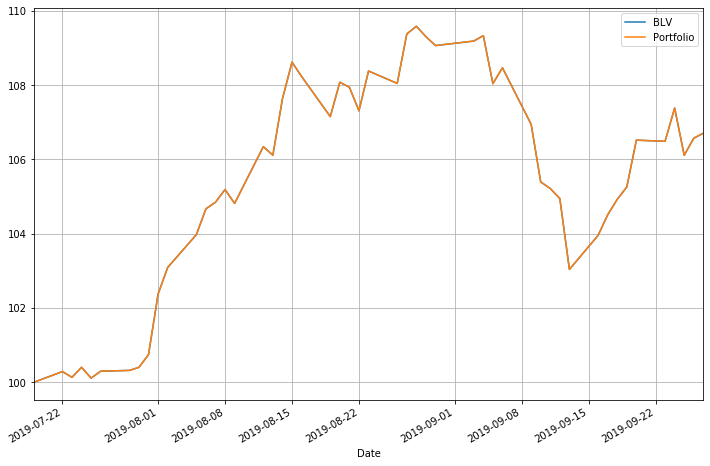

In [3]:
quote.setup_mask(stats.index)
sd = quote.optimize_portfolio()
quote.setup_mask(['BLV'])
sd.update(quote.optimize_portfolio())
quote.setup_mask({e for r in sd.values() for e in r})
sd.update(quote.optimize_portfolio())
for e in sd:
    print(e, sd[e])
_, ratio = sd.peekitem()
quote.setup_mask(ratio)
quote.graph(ratio)